In [1]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadReviews

import pandas as pd
import utility_func as utils
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [2]:
reviews = LoadReviews()

utils.YelpDatasets_Reviews(reviews_df = reviews)


Reviews DataFrame's head:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05
75,ymhbOMW63B_vGaRFR3XT0A,yZdAhQ_KmKuCZmbBy9YDQg,5Ce3lZksYVkCbrihqylVHQ,5,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26
93,onlgwy5qGDEzddsrnIvtWg,pYXeL0RCqus2IfhthYCOyA,W7NxQw8UYFR0HLPrI08tvw,4,0,0,0,Don't know what it is but If my tummy's feelin...,2012-02-01 14:21:25
147,ypFqmURIY41F4pWaMW1VrQ,hToW2eoTAYlOcuNz7I73Cg,7L1kXfwU5XM6f6Jxo_L7Yg,5,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04


In [3]:
reviews = reviews.sample(n=50000, random_state=42)
display(reviews)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1295256,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53
3297618,HlXP79ecTquSVXmjM10QxQ,bAt9OUFX9ZRgGLCXG22UmA,pBNucviUkNsiqhJv5IFpjg,5,0,0,0,I needed a new tires for my wife's car. They h...,2020-05-24 12:22:14
1217795,JBBULrjyGx6vHto2osk_CQ,NRHPcLq2vGWqgqwVugSgnQ,8sf9kv6O4GgEb0j1o22N1g,5,0,0,0,Jim Woltman who works at Goleta Honda is 5 sta...,2019-02-14 03:47:48
3730348,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49
1826590,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25
...,...,...,...,...,...,...,...,...,...
4370202,ggBVjncLGaFcZuTMTowdzQ,cV249zT-6-ebc55E097mcw,H3Tmgv94pbGvBIKZ4Rs9Cw,3,0,0,0,I got the seared snapper with butternut squash...,2015-10-22 13:44:25
2440848,S_i_zK_VIxnxCz7eHoQskQ,rL5uMarIYnEMgDr09pafqg,MbNcVhRqpNPcvgFzWgaxSQ,4,9,4,9,After just one visit I knew I would be a fan o...,2015-08-22 13:04:32
6844225,t_hAiTVFLXqEW4mhkWQdYQ,RQdUrCQAgDx4ZTnWk9PDkg,rErcCh6baqUXkJUbGJZb5Q,1,0,0,0,I had been using Ambler Savings for as long as...,2021-08-11 18:51:16
3097922,qnVvfW-6jdYxPmDXMC46-g,oeBfz1fCDrX9p-6cfTF_cw,LfWs66gXWB7KYolW6xAu-g,5,0,0,0,Some of the best Italian in Edmonton the way t...,2017-04-06 00:50:32


#### Times series using Number of reviews

In [3]:
# change the structure of date column
reviews['date'] = pd.to_datetime(reviews['date']).dt.strftime('%Y-%m')

In [5]:
#group by date and review_id to get the number of reviews per month and year
reviews_per_month = reviews.groupby(['date'])['review_id'].count().reset_index()
reviews_per_month.columns = ['date', 'count']
reviews_per_month['date'] = pd.to_datetime(reviews_per_month['date'])
reviews_per_month = reviews_per_month.sort_values(by='date')
reviews_per_month.head()

,date,count
0,2005-03-01,23
1,2005-04-01,6
2,2005-05-01,1
3,2005-06-01,8
4,2005-07-01,10


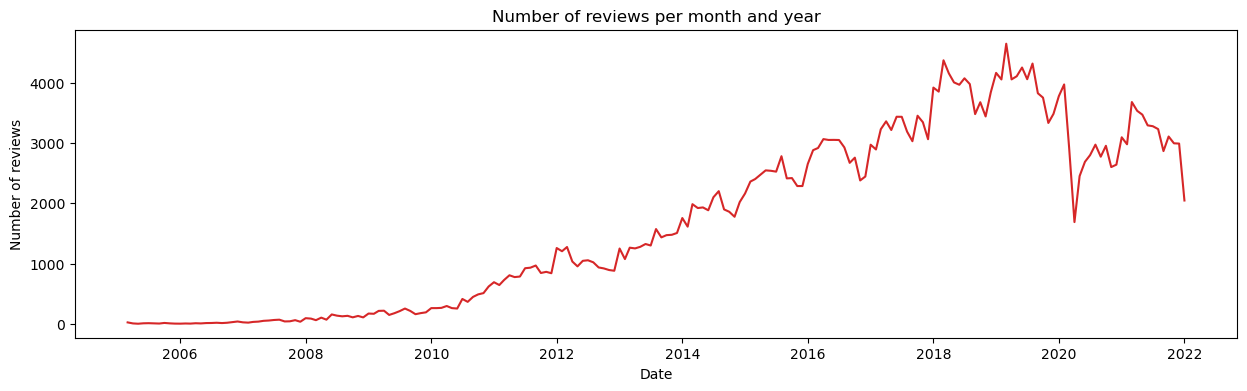

In [6]:
def plot_df(x, y, title="", xlabel='Date', ylabel='Number of reviews', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(x=reviews_per_month['date'], y=reviews_per_month['count'], title='Number of reviews per month and year')

In [6]:
'''#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

x = reviews_per_month['date'].values
y1 = reviews_per_month['count'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-90000, 90000)
plt.title('Number of reviews per month and year (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(reviews_per_month['date']), xmax=np.max(reviews_per_month['date']), linewidth=.5)
plt.show()'''

"#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.\n\nx = reviews_per_month['date'].values\ny1 = reviews_per_month['count'].values\n\n# Plot\nfig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)\nplt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')\nplt.ylim(-90000, 90000)\nplt.title('Number of reviews per month and year (Two Side View)', fontsize=16)\nplt.hlines(y=0, xmin=np.min(reviews_per_month['date']), xmax=np.max(reviews_per_month['date']), linewidth=.5)\nplt.show()"

In [7]:
#count reviews per business and year
reviews
# Extracting the year from the date
count_rev_bus = reviews.groupby(['business_id', 'date'])['review_id'].count().reset_index()
count_rev_bus.columns = ['business_id', 'date', 'count']
count_rev_bus['date'] = pd.to_datetime(count_rev_bus['date'])
count_rev_bus = count_rev_bus.sort_values(by=['date','business_id'])
count_rev_bus['year'] = count_rev_bus['date'].dt.year
count_rev_bus.head()

,business_id,date,count,year
6587,1dLWCD6CjSHD7PTfi5ZVNQ,2005-03-01,1,2005
17421,5YRHE2foNVmv1n8VIJcb-A,2005-03-01,1,2005
27549,96myvjjiQW8ZFp4LrE1gXQ,2005-03-01,1,2005
30174,9zlIJ7Q5W4AENjpGgaNSsQ,2005-03-01,2,2005
33539,B10mqANgHvL8gBteo1UhAA,2005-03-01,1,2005


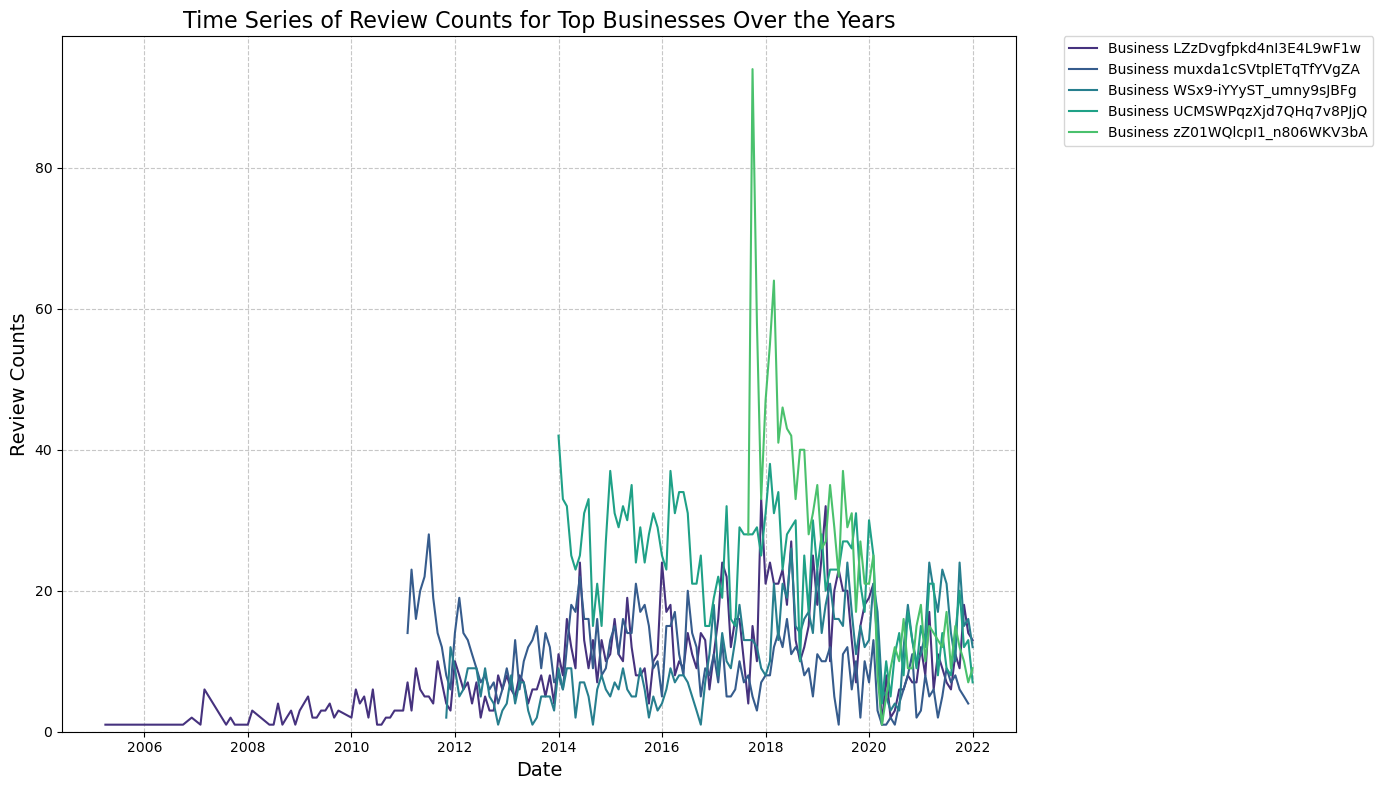

In [8]:
def plot_top_businesses_over_time(df, top_businesses_series):
    """
    Plot the time series of review counts for the top businesses over the years.

    Parameters:
    - df: DataFrame with columns 'business_id', 'date', 'count', and 'year'.
    - top_businesses_series: Pandas Series with the top businesses and their review counts.
    """
    # Convert the Series to a DataFrame
    top_businesses_df = top_businesses_series.reset_index()

    # Filter the DataFrame to include only the top businesses
    top_businesses_df = df[df['business_id'].isin(top_businesses_df['business_id'])]

    # Plotting
    plt.figure(figsize=(14, 8))
    sns.set_palette("viridis")  # You can choose a different color palette if needed

    for business_id in top_businesses_df['business_id'].unique():
        business_data = top_businesses_df[top_businesses_df['business_id'] == business_id]
        sns.lineplot(x='date', y='count', data=business_data, label=f'Business {business_id}')

    plt.title('Time Series of Review Counts for Top Businesses Over the Years', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Review Counts', fontsize=14)
    plt.legend()
    
    # Set y-axis limits to start from 0
    plt.ylim(bottom=0)
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add a legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    plt.show()

# Example usage:
# Assuming you have a list of top businesses called 'top_businesses_list'
top_businesses_series = count_rev_bus.groupby(['business_id'])['count'].sum().sort_values(ascending=False).head(5)
plot_top_businesses_over_time(count_rev_bus, top_businesses_series)

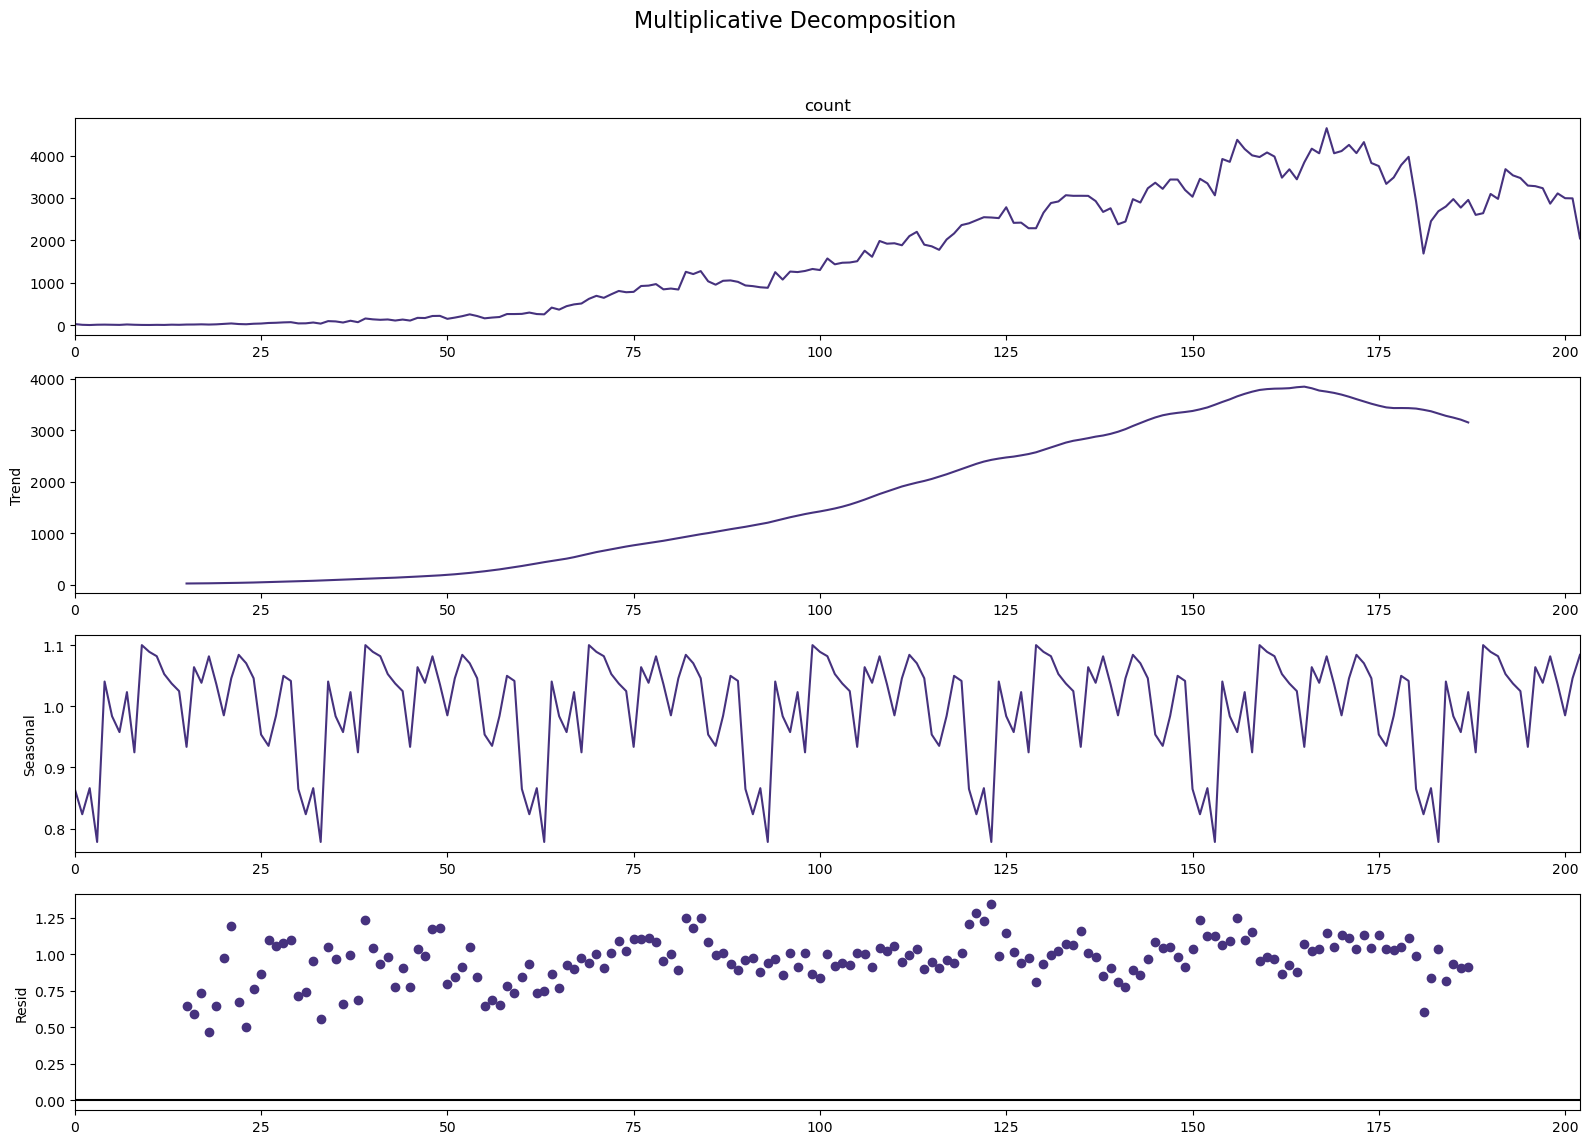

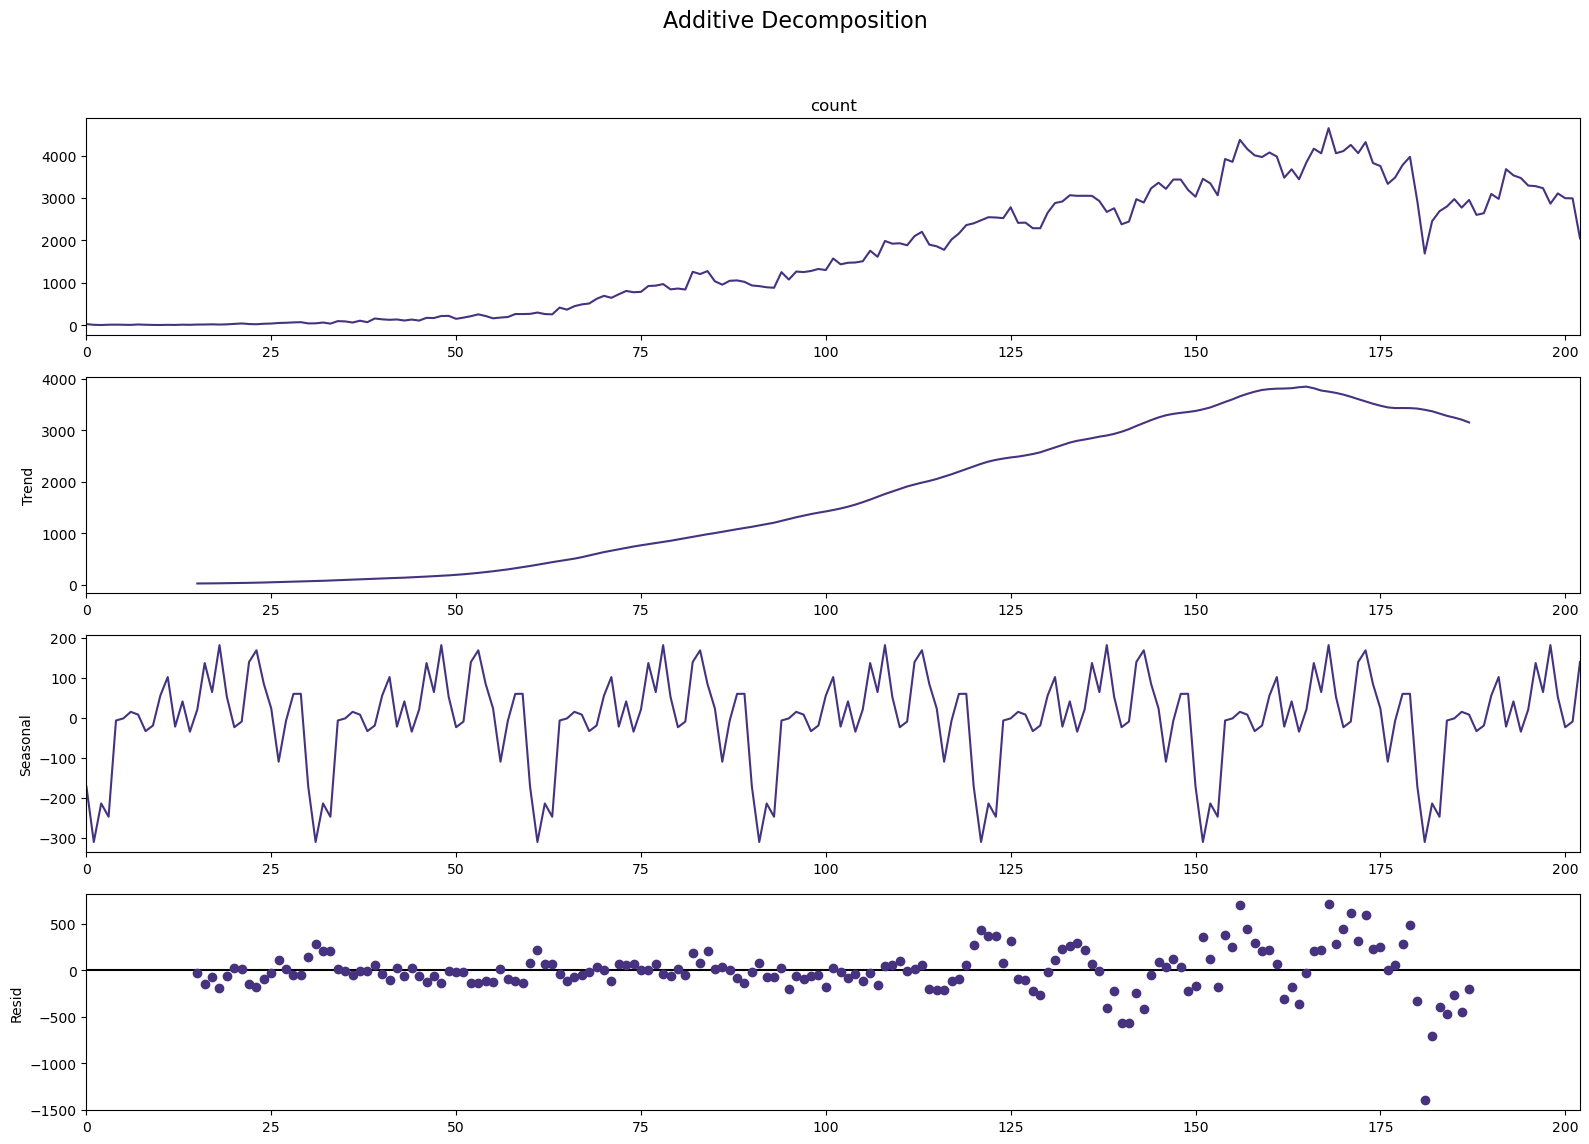

In [9]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(reviews_per_month['count'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(reviews_per_month['count'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

#### Second approach - Sentiments

In [10]:
#1 and 2 stars = -1 while 4 and 5 stars = +1
df=reviews
df = df[df['stars'] != 3]
df['sentiment'] = df['stars'].apply(lambda rating : +1 if rating > 3 else -1)

/var/folders/7h/r2qhkyrj6x951_n8cq54_49w0000gn/T/ipykernel_4509/653212630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['stars'].apply(lambda rating : +1 if rating > 3 else -1)


In [11]:
df_num = df.copy()

In [12]:
# Assuming replacing -1 and 1 with negative and positive respectively
df['sentiment'] = df['sentiment'].replace({-1: 'negative', 1: 'positive'})

/var/folders/7h/r2qhkyrj6x951_n8cq54_49w0000gn/T/ipykernel_4509/3647008845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].replace({-1: 'negative', 1: 'positive'})


In [13]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df_num['date'] = pd.to_datetime(df_num['date']).dt.strftime('%Y-%m')

/var/folders/7h/r2qhkyrj6x951_n8cq54_49w0000gn/T/ipykernel_4509/3550849715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')


In [14]:
# Dividing the reviews to positive and negative
pos = df[df['sentiment']=='positive'][['review_id','business_id','date','sentiment']]
neg = df[df['sentiment']=='negative'][['review_id','business_id','date','sentiment']]

In [15]:
#Preprocessing data
# change the structure of date column
#group by date and review_id to get the number of reviews per month and year
pos_pp = utils.preprocess_sentiment_df(pos)
neg_pp = utils.preprocess_sentiment_df(neg)

In [16]:
display(pos.head())
display(pos_pp.head())

,review_id,business_id,date,sentiment
14,UBp0zWyH60Hmw6Fsasei7w,otQS34_MymijPTdNBoBdCw,2011-10,positive
75,ymhbOMW63B_vGaRFR3XT0A,5Ce3lZksYVkCbrihqylVHQ,2014-07,positive
93,onlgwy5qGDEzddsrnIvtWg,W7NxQw8UYFR0HLPrI08tvw,2012-02,positive
147,ypFqmURIY41F4pWaMW1VrQ,7L1kXfwU5XM6f6Jxo_L7Yg,2015-07,positive
160,Lj1TAURE_hYtPW3IlhKWMg,9xm4aIAT_xwRoTxc0_8AWQ,2015-02,positive


,date,review_id
0,2005-03-01,13
1,2005-04-01,6
2,2005-05-01,1
3,2005-06-01,8
4,2005-07-01,8


In [17]:
#Here we are going to sum the number of positive and negative reviews per month and year
#group by date and review_id to get the number of reviews per month and year
df_num= df_num.groupby(['date'])['sentiment'].sum().reset_index()
df_num['date'] = pd.to_datetime(df_num['date'])
df_num = df_num.sort_values(by='date')
df_num.rename(columns={'sentiment': 'sentiment_count_diff'}, inplace=True)
df_num

,date,sentiment_count_diff
0,2005-03-01,8
1,2005-04-01,6
2,2005-05-01,1
3,2005-06-01,8
4,2005-07-01,7
...,...,...
198,2021-09-01,669
199,2021-10-01,951
200,2021-11-01,931
201,2021-12-01,876


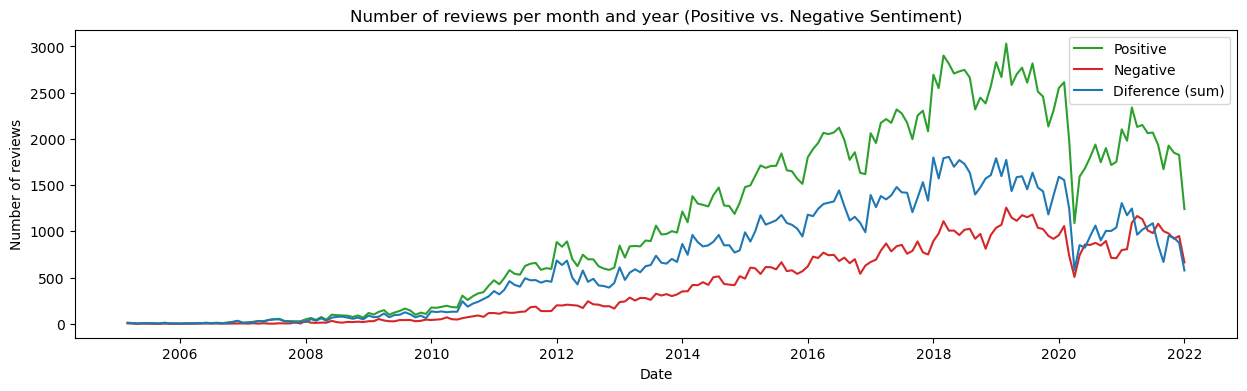

In [18]:
#Visualize the number of reviews per month and year (Positive vs. Negative Sentiment) and the sentiment sum 
utils.plot_df(x_pos=pos_pp['date'], y_pos=pos_pp['review_id'],
              x_neg=neg_pp['date'], y_neg=neg_pp['review_id'],
              x_df_num=df_num['date'], y_df_num=df_num['sentiment_count_diff'],
              title='Number of reviews per month and year (Positive vs. Negative Sentiment)')

In [30]:
'''#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

x = pos_pp['date'].values
y1 = pos_pp['review_id'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-70000, 70000)
plt.title('Number of reviews per month and year (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(pos_pp['date']), xmax=np.max(pos_pp['date']), linewidth=.5)
plt.show()'''

"#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.\n\nx = pos_pp['date'].values\ny1 = pos_pp['review_id'].values\n\n# Plot\nfig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)\nplt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')\nplt.ylim(-70000, 70000)\nplt.title('Number of reviews per month and year (Two Side View)', fontsize=16)\nplt.hlines(y=0, xmin=np.min(pos_pp['date']), xmax=np.max(pos_pp['date']), linewidth=.5)\nplt.show()"

In [21]:
'''#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

x = neg_pp['date'].values
y1 = neg_pp['review_id'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='red')
plt.ylim(-25000, 25000)
plt.title('Number of reviews per month and year (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(neg_pp['date']), xmax=np.max(neg_pp['date']), linewidth=.5)
plt.show()'''

"#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.\n\nx = neg_pp['date'].values\ny1 = neg_pp['review_id'].values\n\n# Plot\nfig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)\nplt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='red')\nplt.ylim(-25000, 25000)\nplt.title('Number of reviews per month and year (Two Side View)', fontsize=16)\nplt.hlines(y=0, xmin=np.min(neg_pp['date']), xmax=np.max(neg_pp['date']), linewidth=.5)\nplt.show()"

In [19]:
def business_review_counts(df):
    top_business = df.groupby(['business_id', 'date'])['review_id'].count().reset_index()
    top_business.columns = ['business_id', 'date', 'count']
    top_business['date'] = pd.to_datetime(top_business['date'])
    top_business = top_business.sort_values(by=['date', 'business_id'])
    top_business['year'] = top_business['date'].dt.year
    return top_business

# Assuming 'pos' and 'neg' are DataFrames with columns 'business_id', 'date', and 'review_id'
pos_business_counts = business_review_counts(pos)
neg_business_counts = business_review_counts(neg)

# Get the top 10 businesses by total review count
top_10_pos_business_ids = pos_business_counts.groupby('business_id')['count'].sum().nlargest(10).index
top_10_pos_business = pos_business_counts[pos_business_counts['business_id'].isin(top_10_pos_business_ids)]

top_10_neg_business_ids = neg_business_counts.groupby('business_id')['count'].sum().nlargest(10).index
top_10_neg_business = neg_business_counts[neg_business_counts['business_id'].isin(top_10_neg_business_ids)]


display(top_10_pos_business)

,business_id,date,count,year
45025,LZzDvgfpkd4nI3E4L9wF1w,2005-04-01,1,2005
45026,LZzDvgfpkd4nI3E4L9wF1w,2006-03-01,1,2006
61734,UjQnH-pElJZ9jD51vOt5Rw,2006-04-01,1,2006
56655,Rv8bW3pkzpi5dZu5ckbgtA,2006-06-01,1,2006
45027,LZzDvgfpkd4nI3E4L9wF1w,2006-07-01,1,2006
...,...,...,...,...
65413,WSx9-iYYyST_umny9sJBFg,2022-01-01,11,2022
90185,hyeo7JQr5uLp-St1MibYAA,2022-01-01,4,2022
92828,j8feOxyJqlIJWOi8su2qzw,2022-01-01,3,2022
128265,zZ01WQlcpI1_n806WKV3bA,2022-01-01,3,2022


In [20]:
# Extracting the year from the date
pos = pos.groupby(['business_id', 'date'])['review_id'].count().reset_index()
pos.columns = ['business_id', 'date', 'count']
pos['date'] = pd.to_datetime(pos['date'])
pos = pos.sort_values(by=['date','business_id'])
pos['year'] = pos['date'].dt.year
pos.head(10)

,business_id,date,count,year
4594,1dLWCD6CjSHD7PTfi5ZVNQ,2005-03-01,1,2005
19618,96myvjjiQW8ZFp4LrE1gXQ,2005-03-01,1,2005
21542,9zlIJ7Q5W4AENjpGgaNSsQ,2005-03-01,2,2005
23981,B10mqANgHvL8gBteo1UhAA,2005-03-01,1,2005
60181,U06ky7tOjrwad_zx05D9yQ,2005-03-01,1,2005
69469,YSRM9nWQn40eg49tSiI-_Q,2005-03-01,1,2005
71347,ZWQKlFu_fFzMkkn5mWkfSQ,2005-03-01,1,2005
74598,aAyCUTc7y9ZIN1OZ7tGe6Q,2005-03-01,1,2005
80523,dMGWB4TEfEhgInQefGimAw,2005-03-01,1,2005
110159,rgT1MuKGJHgdNqdm1zxJHw,2005-03-01,1,2005


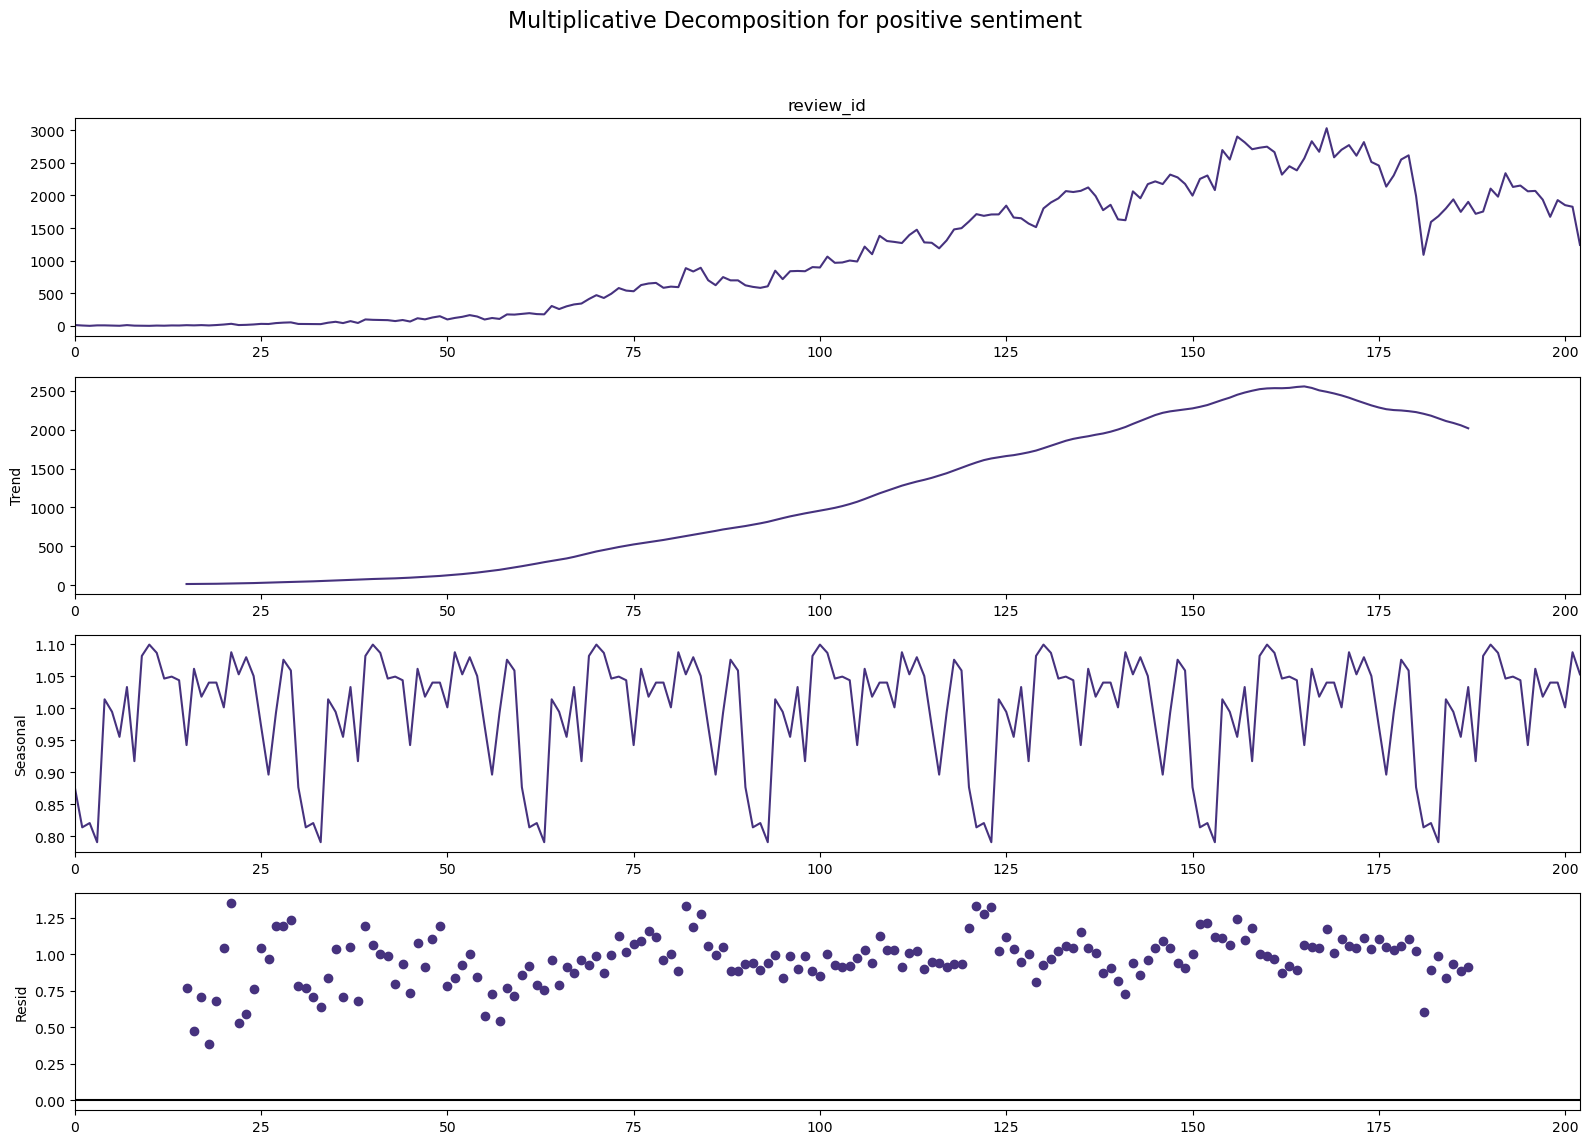

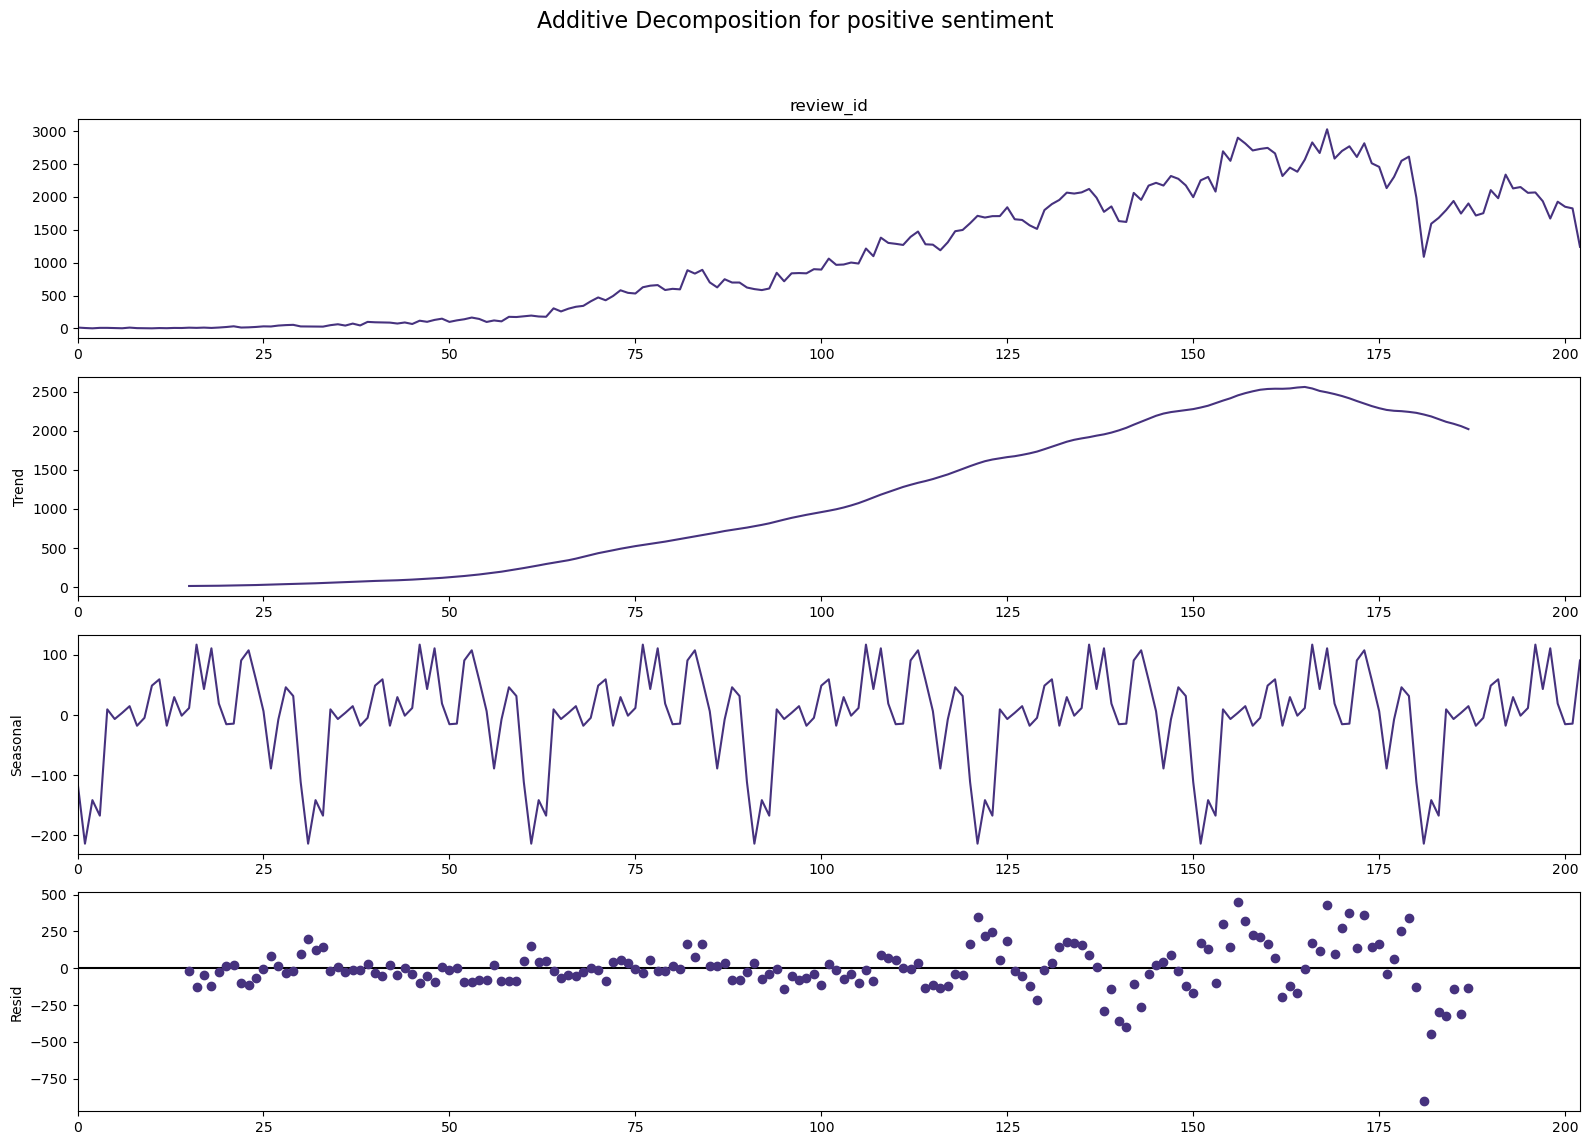

In [21]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(pos_pp['review_id'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(pos_pp['review_id'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition for positive sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition for positive sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

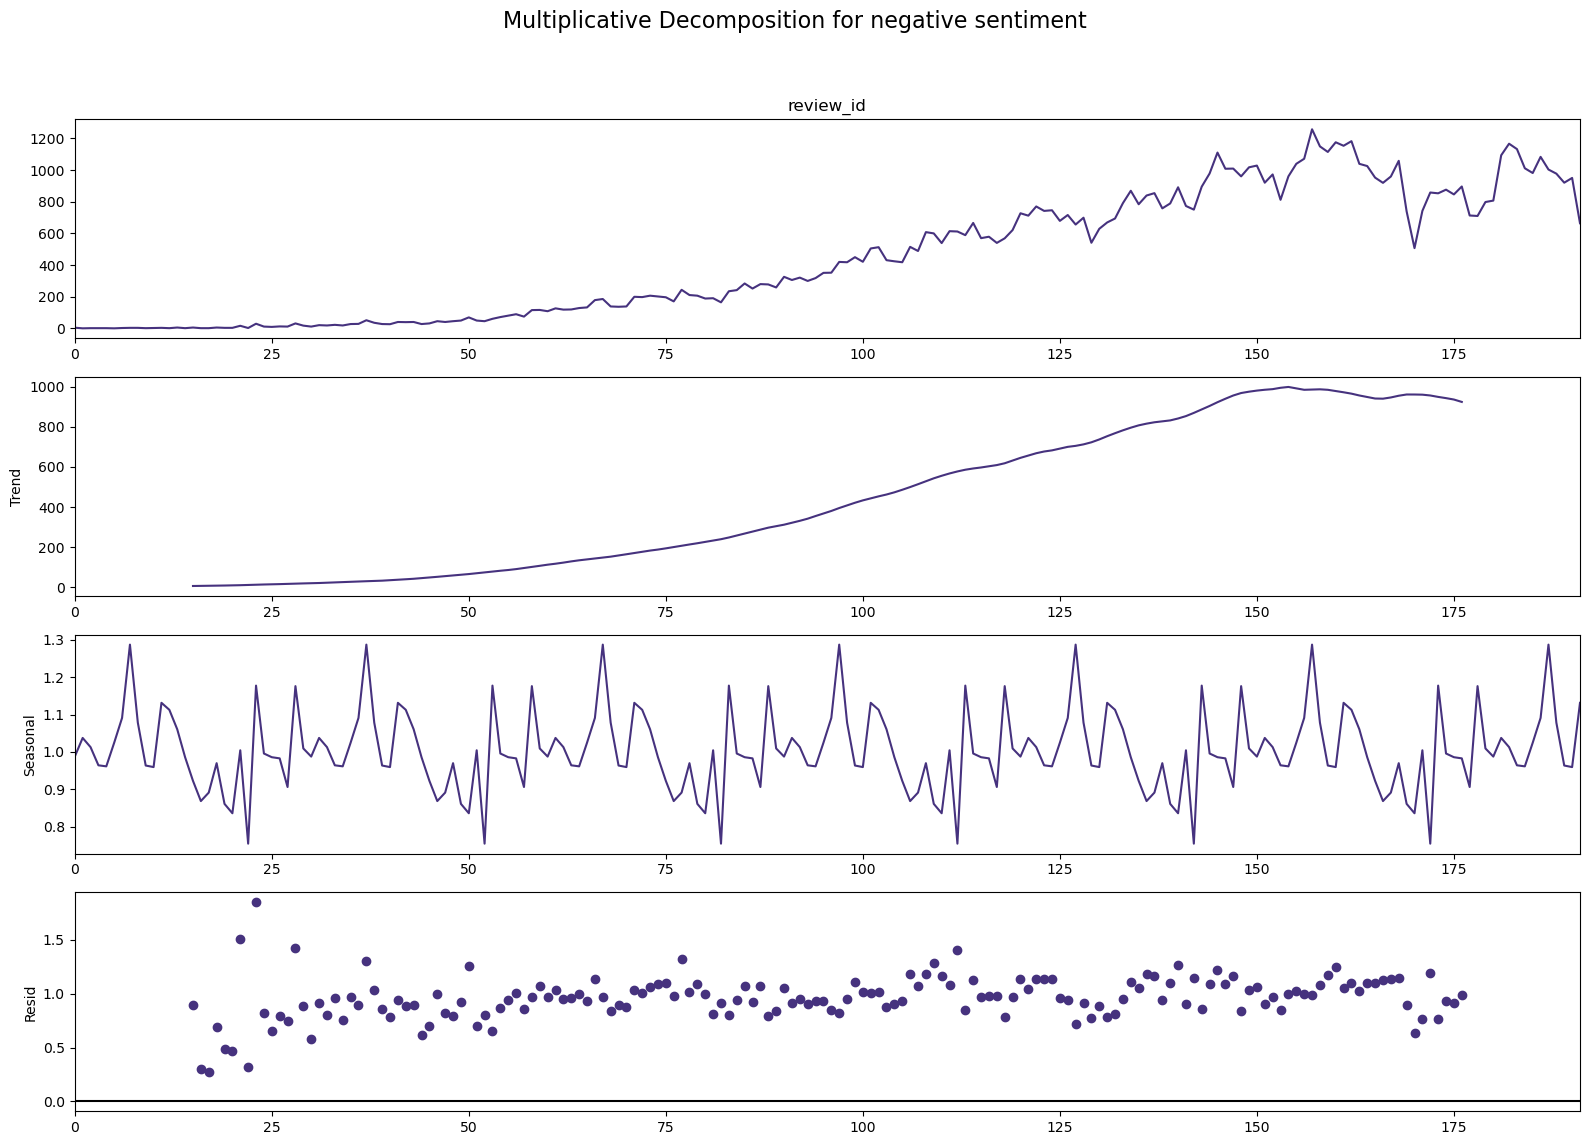

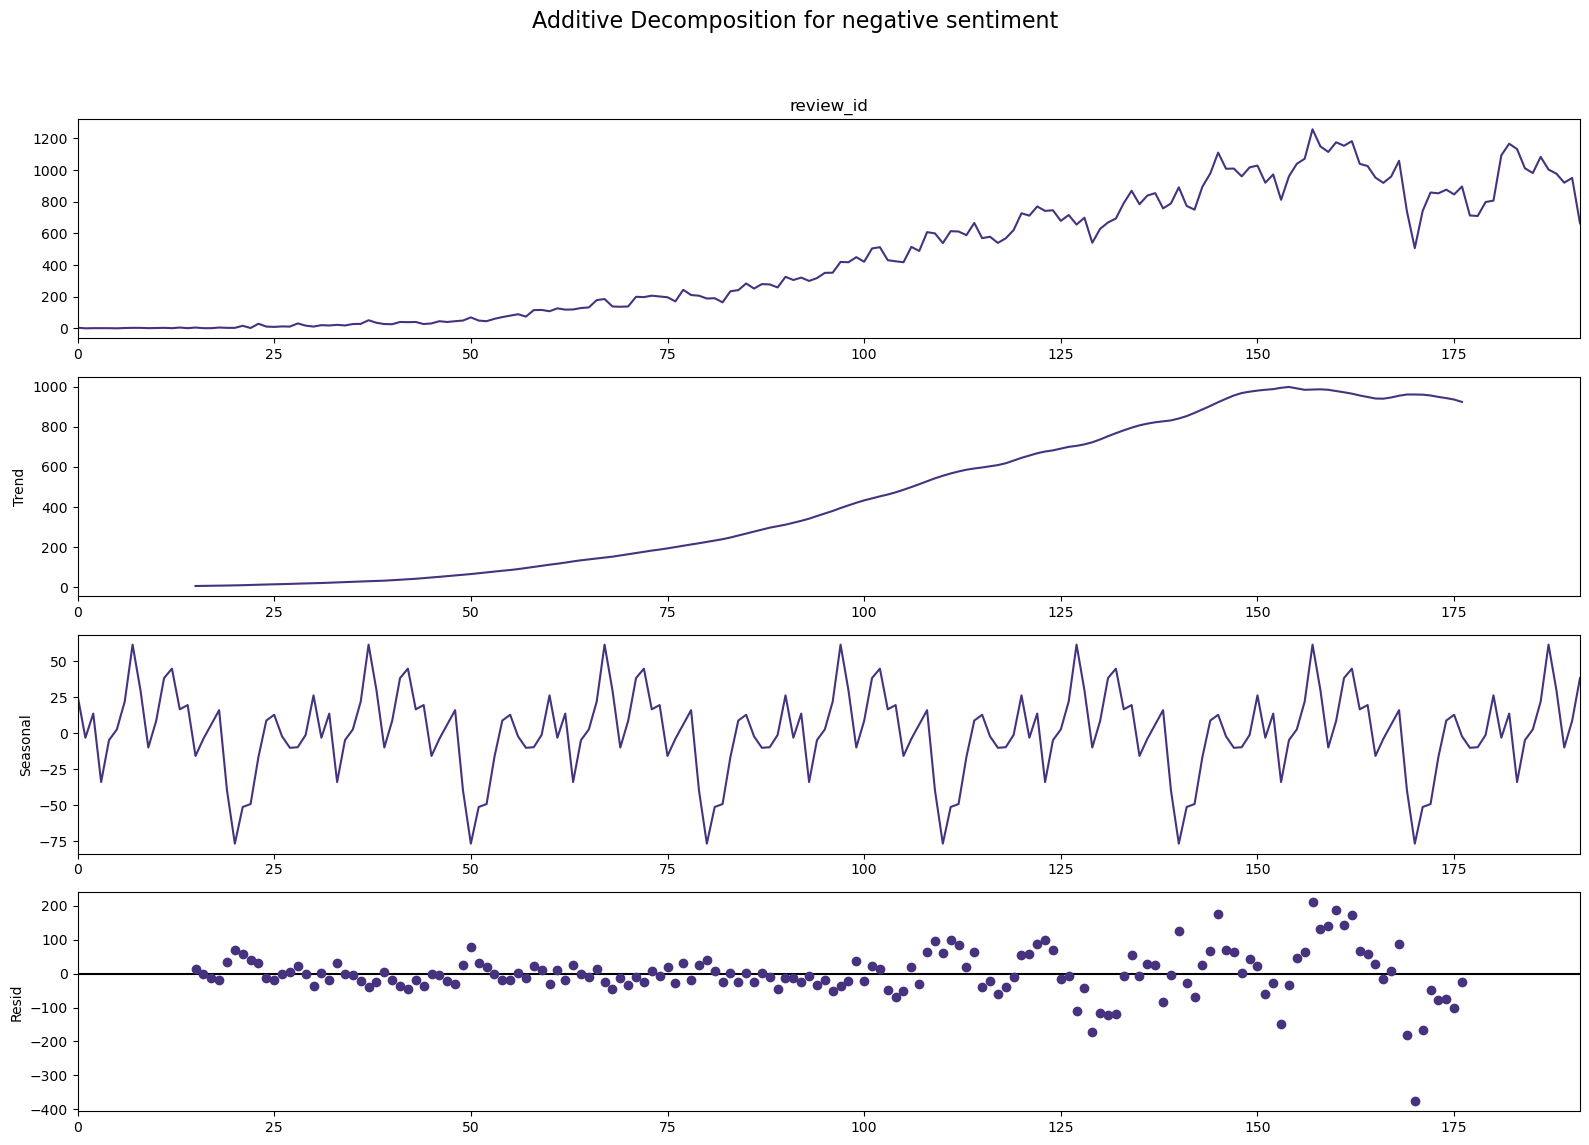

In [22]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(neg_pp['review_id'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(neg_pp['review_id'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition for negative sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition for negative sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

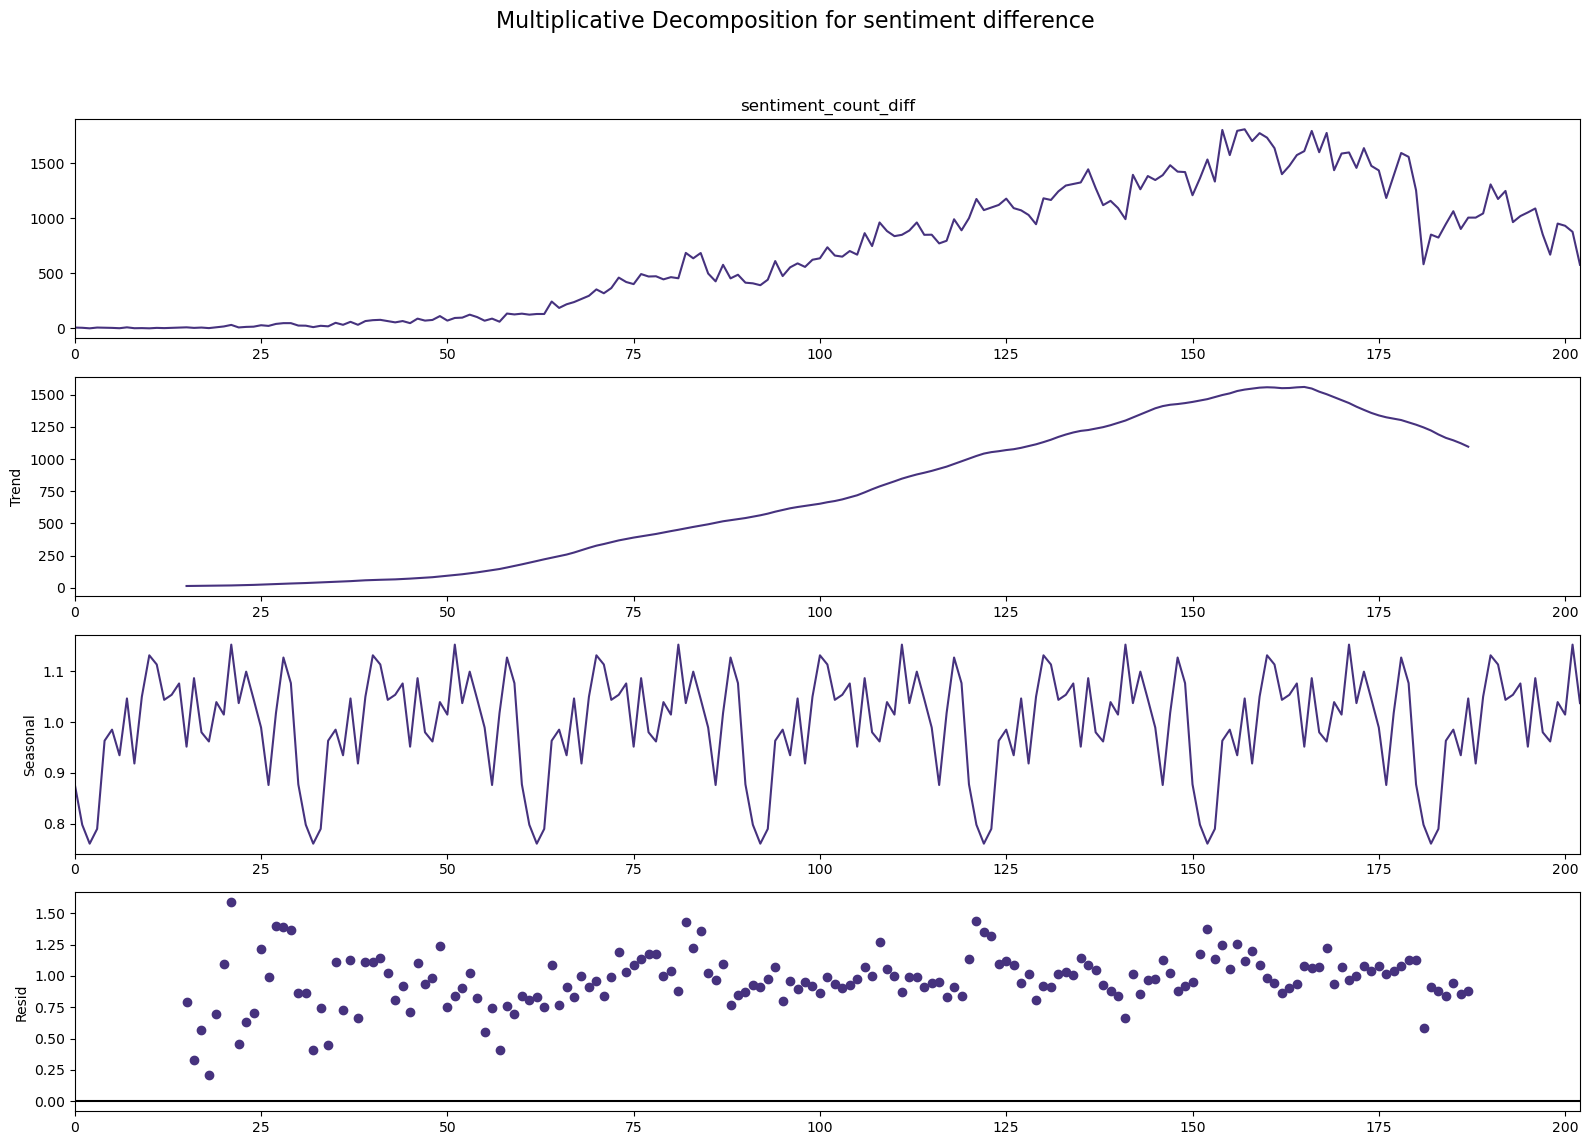

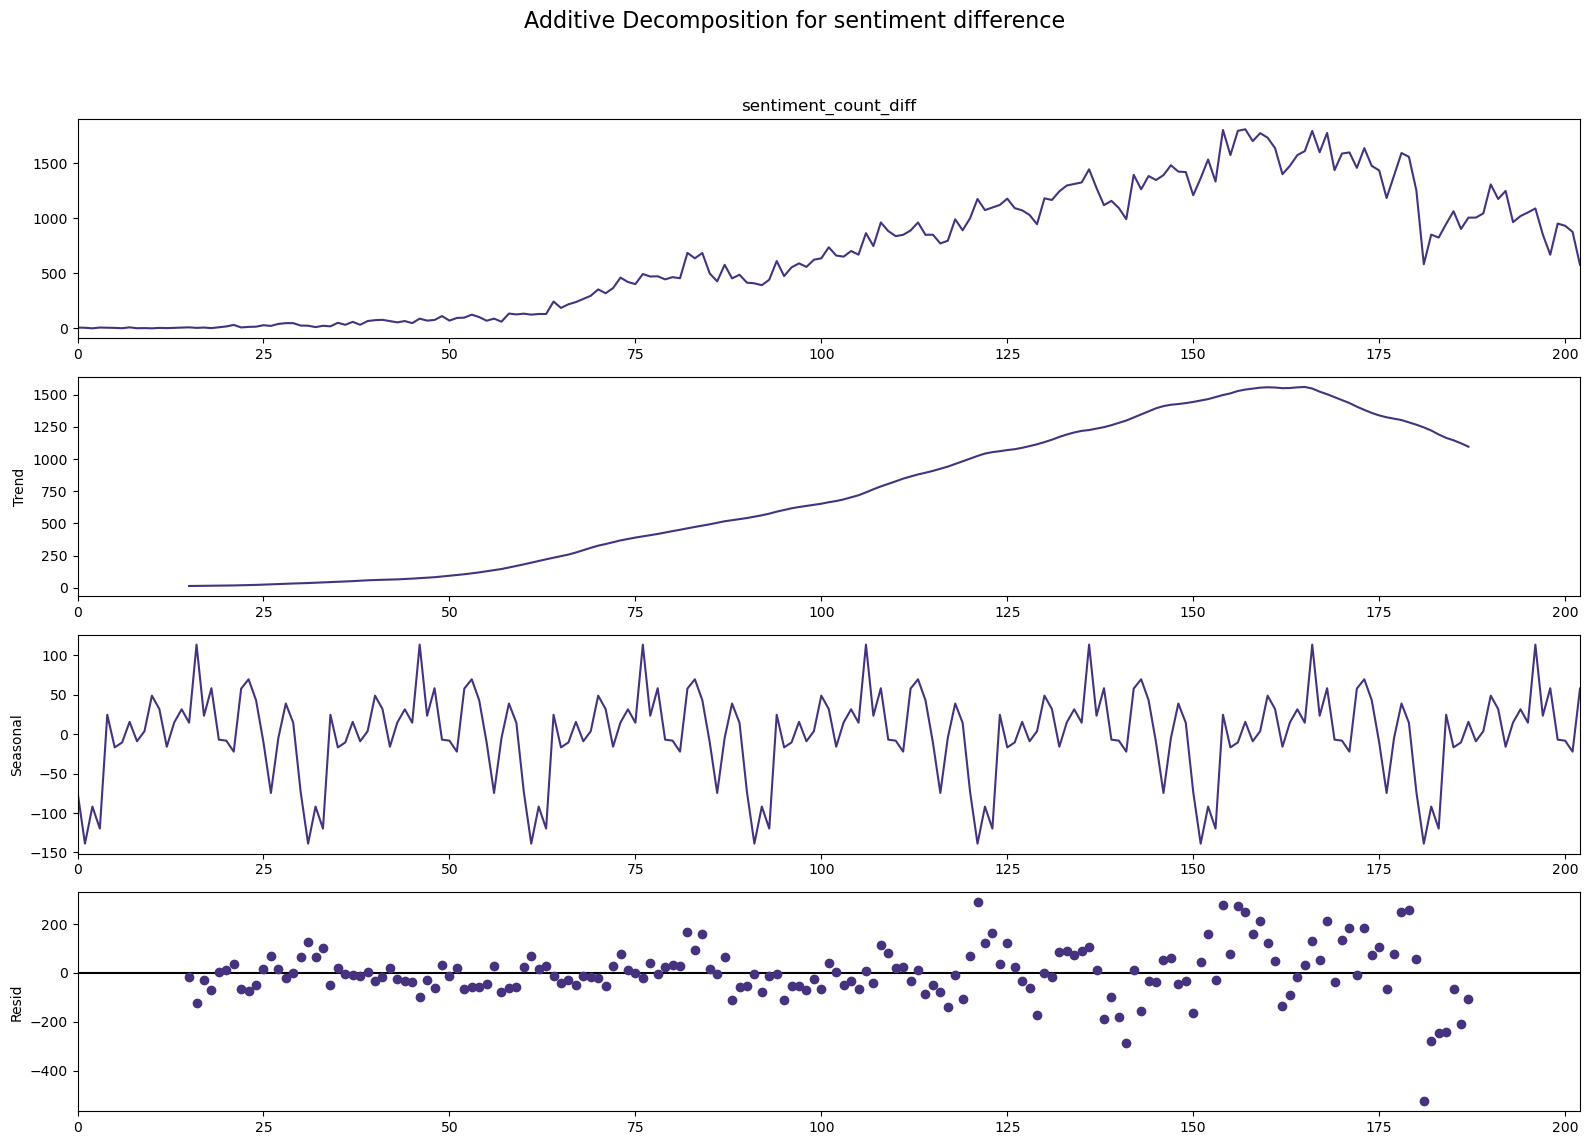

In [23]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_num['sentiment_count_diff'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_num['sentiment_count_diff'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition for sentiment difference', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition for sentiment difference', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

##### Exponential Smoothing

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, HoltWintersResults

In [25]:
HoltWintersAdditive = ExponentialSmoothing(endog=pos_pp['review_id'], trend='additive', seasonal='additive', seasonal_periods=12)
HoltWintersAdditive_results = HoltWintersAdditive.fit()
HoltWintersAdditive_results.summary()

Dep. Variable:,review_id,No. Observations:,203
Model:,ExponentialSmoothing,SSE,4298028.356
Optimized:,True,AIC,2053.974
Trend:,Additive,BIC,2106.985
Seasonal:,Additive,AICC,2057.691
Seasonal Periods:,12,Date:,"Mon, 02 Oct 2023"
Box-Cox:,False,Time:,18:32:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8516325,alpha,True
smoothing_trend,0.0020344,beta,True


In [26]:
HoltWintersMultiplicative = ExponentialSmoothing(endog=pos_pp['review_id'], trend='multiplicative', seasonal='multiplicative', seasonal_periods=12)
HoltWintersMultiplicative_results = HoltWintersMultiplicative.fit()
HoltWintersMultiplicative_results.summary()

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Dep. Variable:,review_id,No. Observations:,203
Model:,ExponentialSmoothing,SSE,5015015.841
Optimized:,True,AIC,2085.292
Trend:,Multiplicative,BIC,2138.304
Seasonal:,Multiplicative,AICC,2089.010
Seasonal Periods:,12,Date:,"Mon, 02 Oct 2023"
Box-Cox:,False,Time:,18:32:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5353583,alpha,True
smoothing_trend,0.0765022,beta,True


In [27]:
HoltWintersAdditive_results.forecast(12)

203    1224.716392
204    1269.982397
205    1034.880441
206    1188.954060
207    1188.455528
208    1191.833534
209    1205.351075
210    1025.729430
211    1183.791357
212    1083.992403
213    1157.148091
214    1450.326748
dtype: float64

In [28]:
HoltWintersMultiplicative_results.forecast(12)

203    1552.305743
204    1603.542840
205    1362.429498
206    1468.872681
207    1472.228714
208    1468.814741
209    1448.236925
210    1266.549027
211    1341.976556
212    1208.330502
213    1183.051130
214    1348.337421
dtype: float64

##### Stationary and Non-Stationary Time Series 

In [29]:
# Convert 'Date' column to a numeric representation
pos_pp['date'] = pos_pp['date'].apply(lambda x: x.timestamp())
neg_pp['date'] = neg_pp['date'].apply(lambda x: x.timestamp())

# Checking the result
display(pos_pp)

,date,review_id
0,1.109635e+09,13
1,1.112314e+09,6
2,1.114906e+09,1
3,1.117584e+09,8
4,1.120176e+09,8
...,...,...
198,1.630454e+09,1672
199,1.633046e+09,1928
200,1.635725e+09,1851
201,1.638317e+09,1826


ADF Statistic: -1.3454174838912158
p-value: 0.6081462971702416
Critical Values:
   1%: -3.465620397124192
   5%: -2.8770397560752436
   10%: -2.5750324547306476


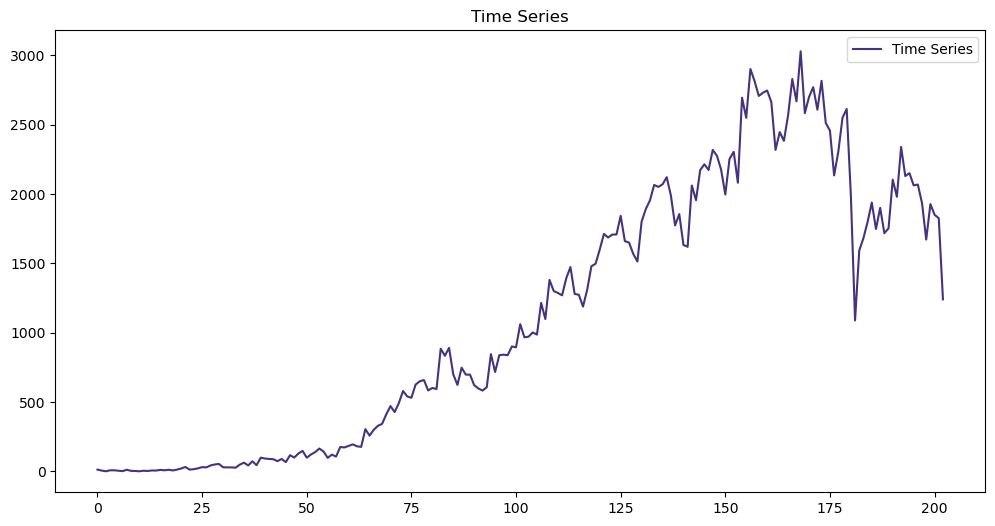

In [30]:
# Check stationarity for the example time series
#Augmented Dickey-Fuller (ADF) test, a common statistical test for stationarity
utils.check_stationarity(pos_pp['review_id'])

#### The high p-value and the ADF statistic being greater than the critical values suggest that we fail to reject the null hypothesis. The null hypothesis of the ADF test is that the time series has a unit root and is non-stationary.

ADF Statistic: -1.434231165886638
p-value: 0.5657597541520768
Critical Values:
   1%: -3.465058702600837
   5%: -2.8767942675230356
   10%: -2.5749014492475535


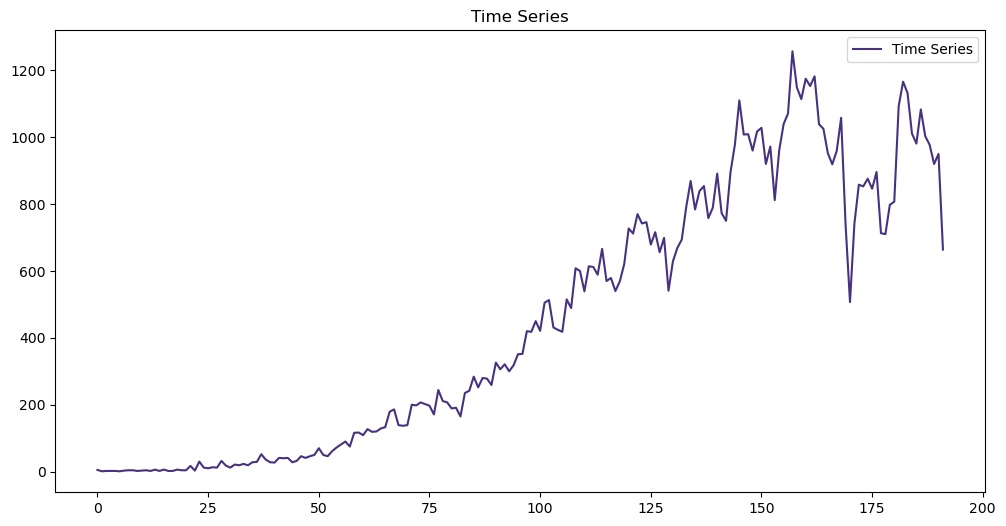

In [31]:
def check_stationarity(ts):
    # ADF test
    result = adfuller(ts, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label='Time Series')
    plt.title('Time Series')
    plt.legend()
    plt.show()

# Check stationarity for the example time series
check_stationarity(neg_pp['review_id'])

#### The high p-value and the ADF statistic being greater than the critical values suggest that we fail to reject the null hypothesis. The null hypothesis of the ADF test is that the time series has a unit root and is non-stationary.

ADF Statistic: -1.4815130699444683
p-value: 0.5426359337105198
Critical Values:
   1%: -3.465620397124192
   5%: -2.8770397560752436
   10%: -2.5750324547306476


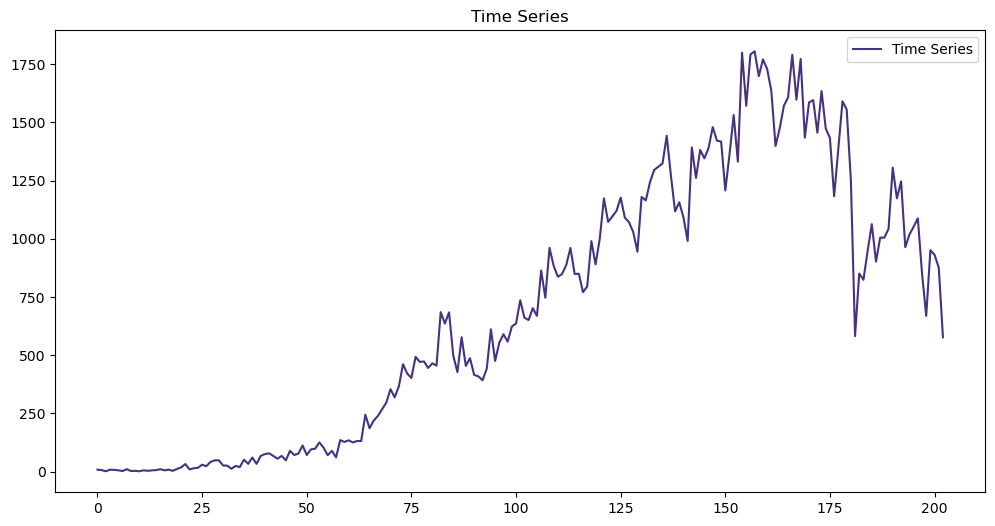

In [32]:
# Check stationarity for the example time series
utils.check_stationarity(df_num['sentiment_count_diff'])

###### below I am testing if the moving average makes the time series stationary
###### but is failed

https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322

In [33]:
pos_pp['moving_avg'] = pos_pp['review_id'].rolling(window=6).mean()
# Drop NaN values (resulting from the rolling mean operation)
pos_pp.dropna(inplace=True)

ADF Statistic: -1.220139156147966
p-value: 0.6648729156827353
Critical Values:
   1%: -3.4668001583460613
   5%: -2.8775552336674317
   10%: -2.5753075498128246


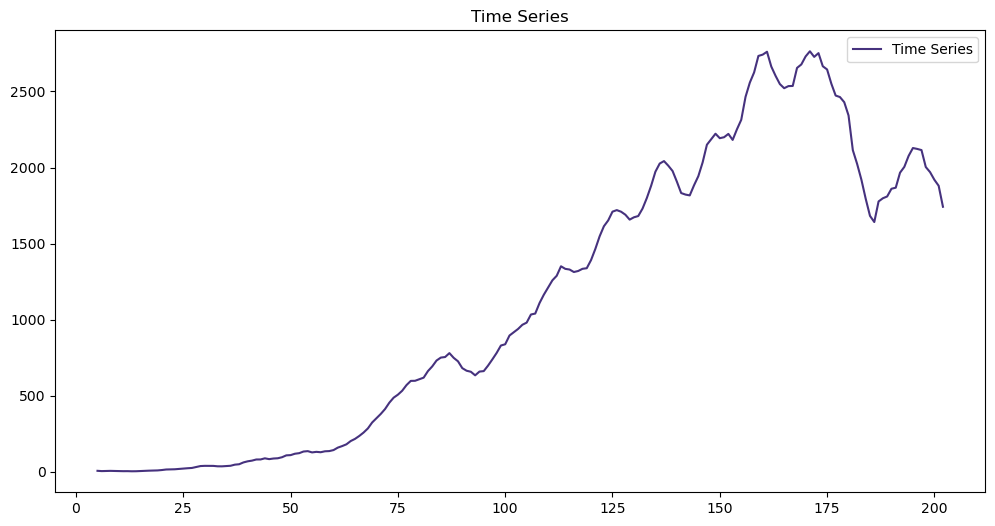

In [34]:
# Check stationarity for the example time series
utils.check_stationarity(pos_pp['moving_avg'])

In [35]:
#Here we are to use the differencing method to make the time series stationary
#This involves subtracting each observation from the one preceding it. You can also try second-order differencing if needed.
pos_pp['stationary_series'] = pos_pp['review_id'] - pos_pp['review_id'].shift(12)
pos_pp.dropna(inplace=True)

ADF Statistic: -2.4702348026898413
p-value: 0.1228854871642075
Critical Values:
   1%: -3.4756368462466662
   5%: -2.8814104466172608
   10%: -2.5773652982553568


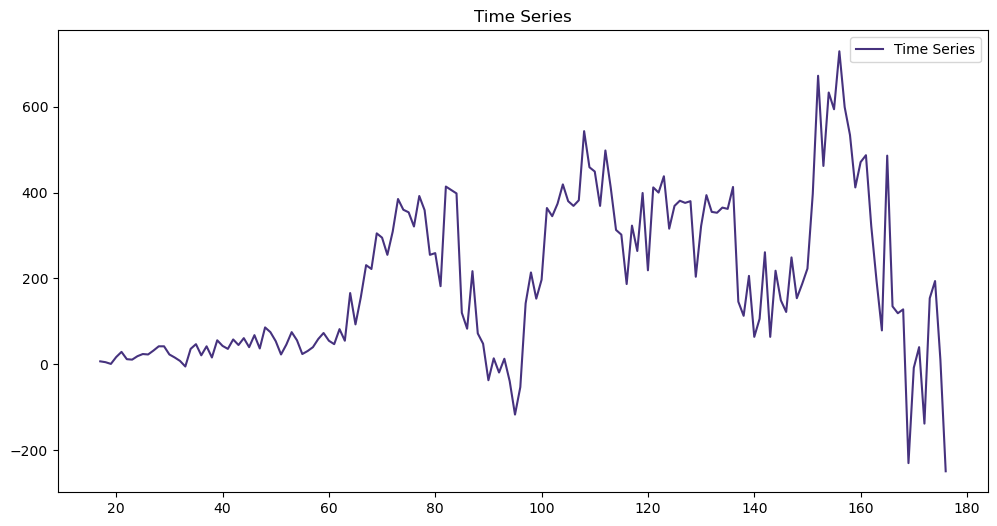

In [36]:
# Check stationarity for the example time series
check_stationarity(pos_pp.head(160)['stationary_series'])

##### The ADF Statistic is more extreme (in the rejection region) than the critical values at all typical significance levels (1%, 5%, 10%).
Therefore, you would reject the null hypothesis, indicating that there is enough evidence to conclude that your time series is stationary. A lower p-value and a more extreme ADF Statistic provide stronger evidence against the null hypothesis of non-stationarity.

In summary, your time series appears to be stationary based on the ADF test results.

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


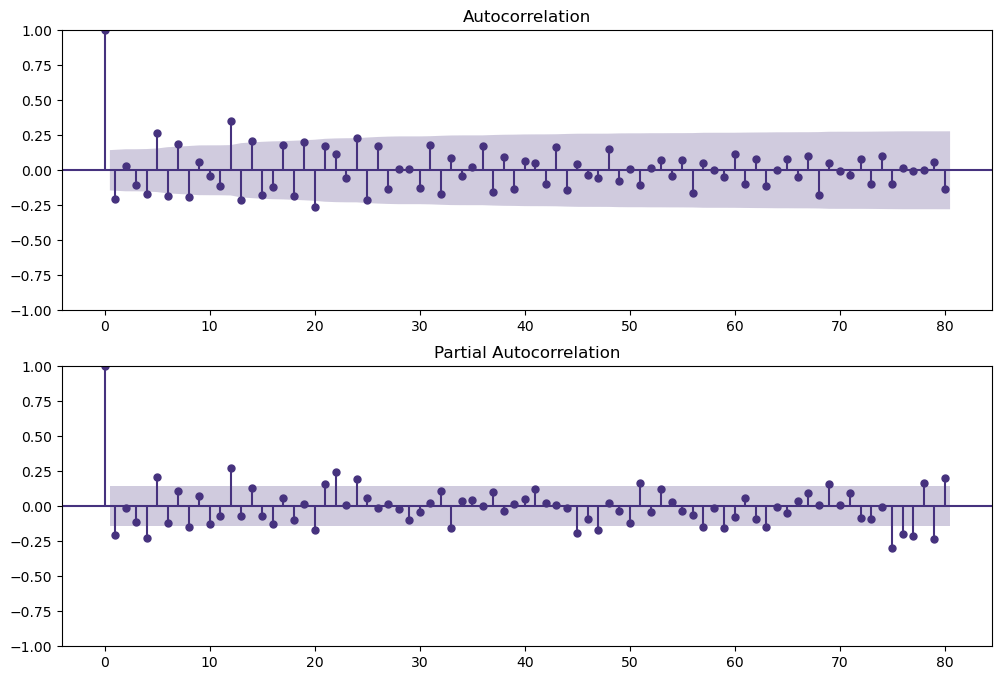

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#pos['date'] = pos['date'].apply(lambda x: x.timestamp())
# Assuming your time series is stored in 'ts'
ts_diff = pos_pp['review_id'].diff().dropna()  # Differencing to achieve stationarity

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(ts_diff, ax=ax1, lags=80)
plot_pacf(ts_diff, ax=ax2, lags=80)

plt.show()


/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: Use

                               SARIMAX Results                                
Dep. Variable:              review_id   No. Observations:                  186
Model:               ARIMA(12, 1, 12)   Log Likelihood               -1172.051
Date:                Mon, 02 Oct 2023   AIC                           2394.103
Time:                        18:36:22   BIC                           2474.612
Sample:                             0   HQIC                          2426.731
                                - 186                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0610      0.573      0.106      0.915      -1.062       1.184
ar.L2          0.1201      0.605      0.199      0.843      -1.066       1.306
ar.L3         -0.0849      0.485     -0.175      0.8

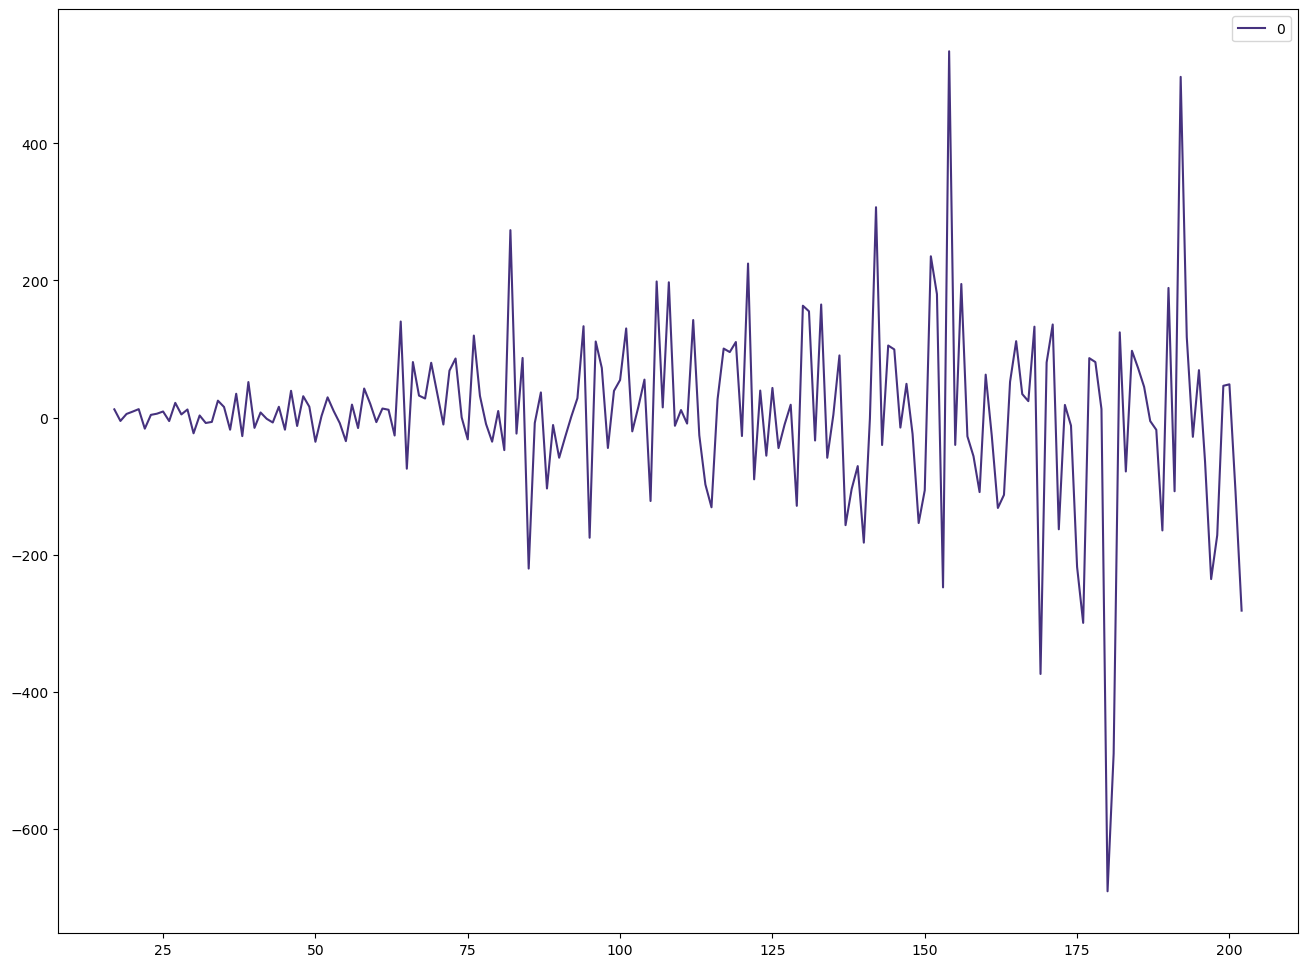

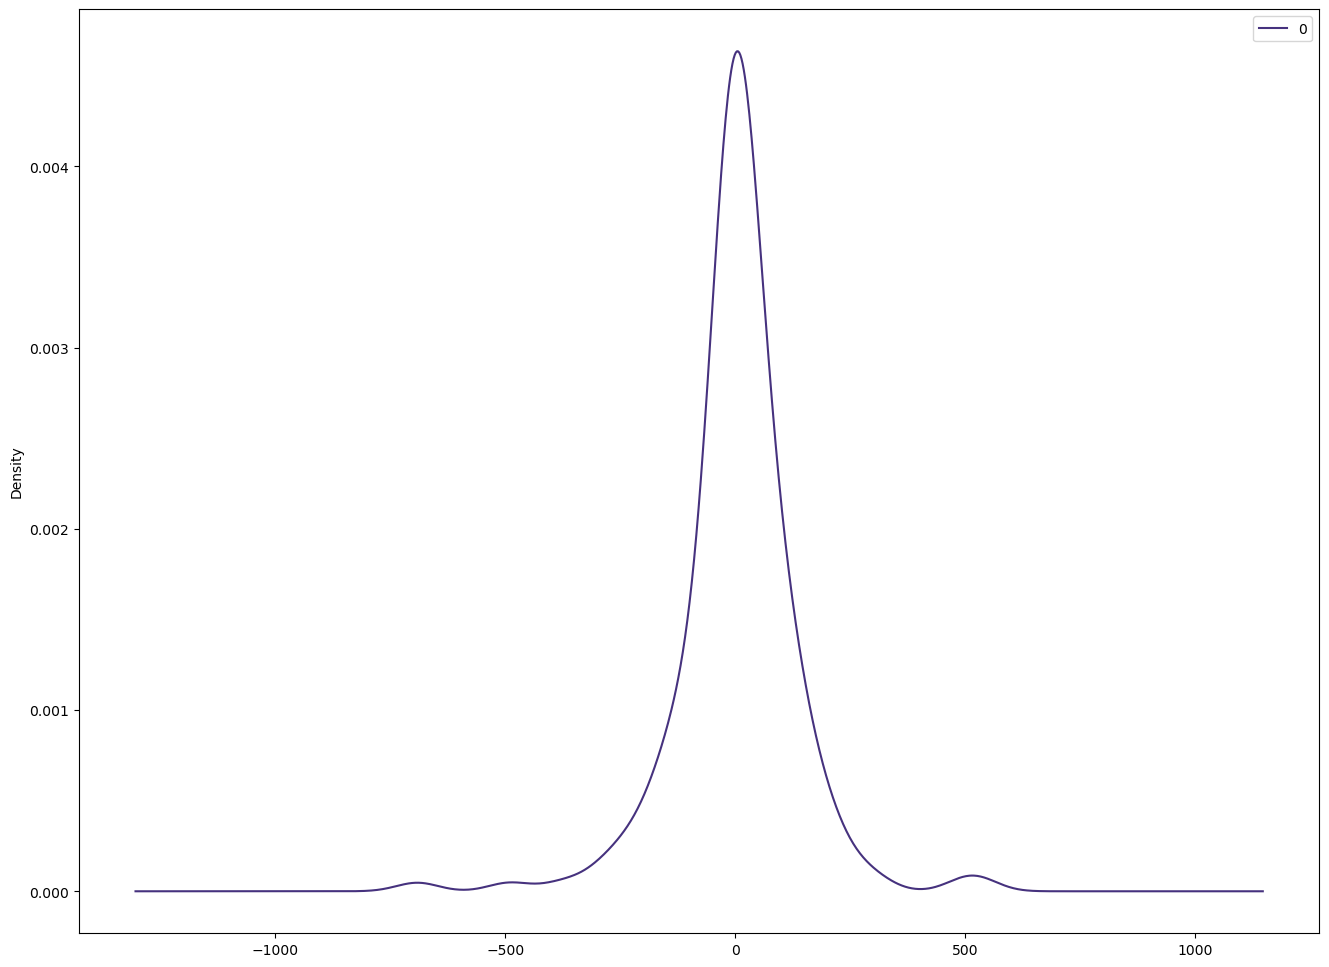

                0
count  186.000000
mean     3.903478
std    129.289812
min   -690.927973
25%    -30.827390
50%      5.477072
75%     52.090177
max    534.264158


In [38]:
# fit model
model = ARIMA(pos_pp['review_id'], order=(12,1,12))  #p,d,q
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


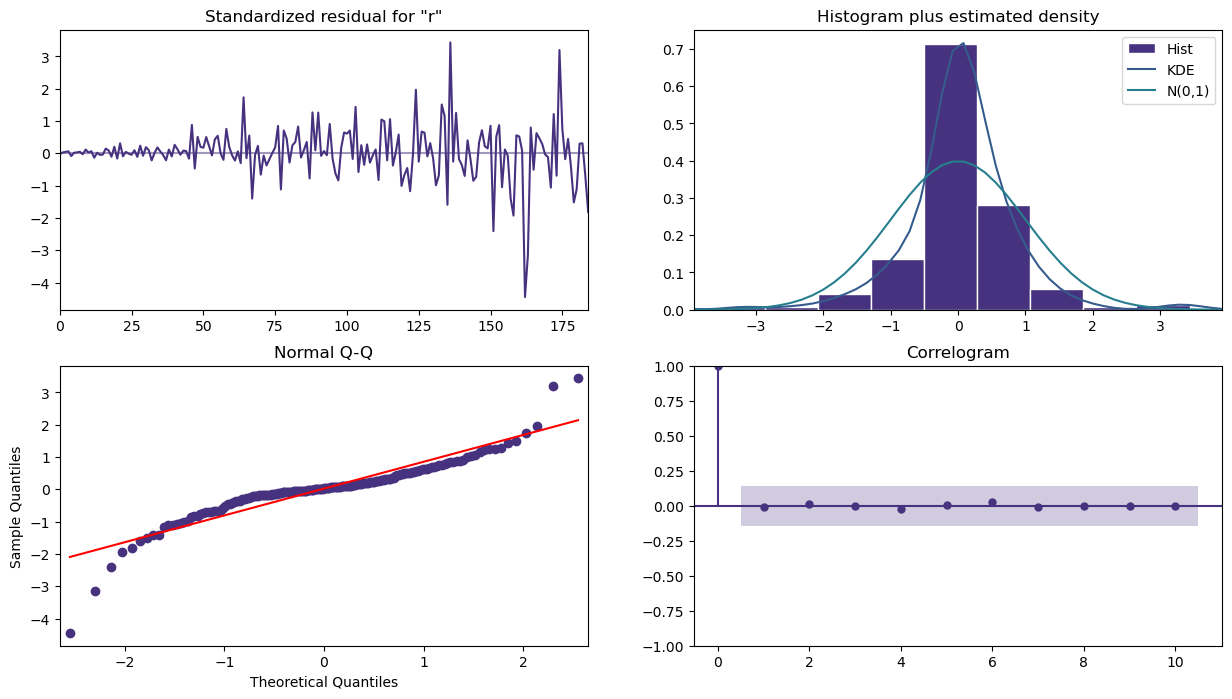

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


TypeError: unsupported operand type(s) for +: 'numpy.int64' and 'DateOffset'

In [39]:
# Plot residuals
results = model.fit()
results.plot_diagnostics(figsize=(15, 8))
plt.show()

# Forecast future values
forecast_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame({'forecast': forecast.predicted_mean.values}, index=forecast_index)

# Plot the original time series and the forecast
plt.plot(df['review_id'], label='Original Time Series')
plt.plot(forecast_df['forecast'], label='Forecast')
plt.legend()
plt.show()